In [2]:
import sys, traceback
import cv2
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv

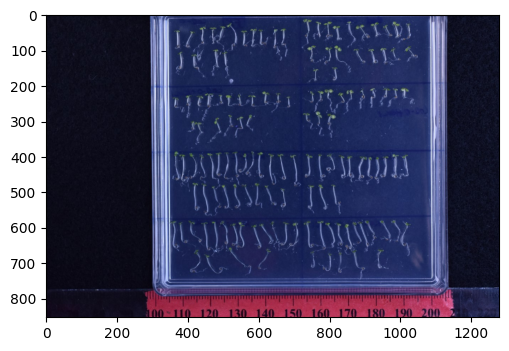

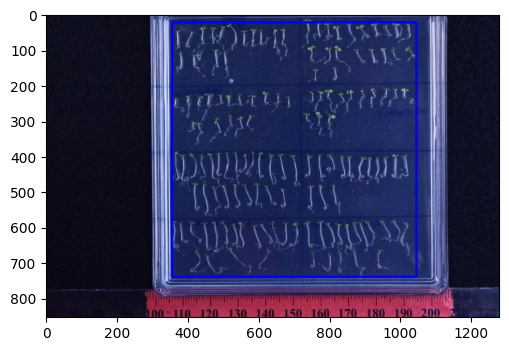

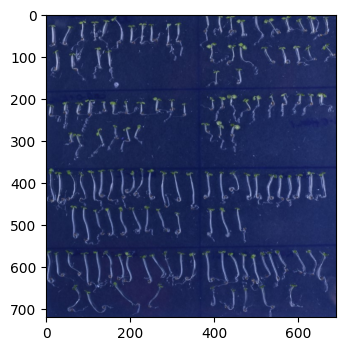

In [366]:
img, path, filename = pcv.readimage(filename= 'testing5.png')
import matplotlib.pyplot as plt
pcv.params.debug = "plot"

img = pcv.crop(img=img, x=355, y=20, h=720, w=690)

image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

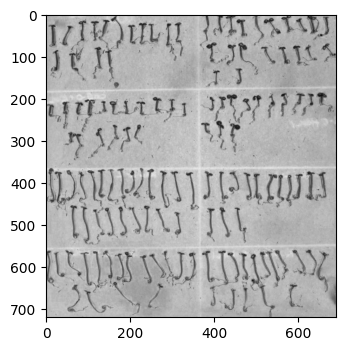

In [367]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

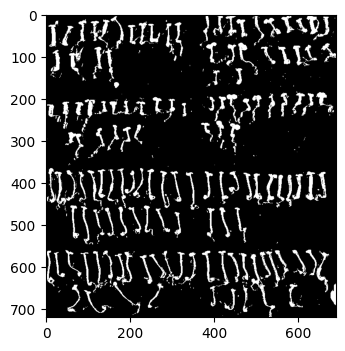

In [377]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=140, max_value=255, object_type='dark')

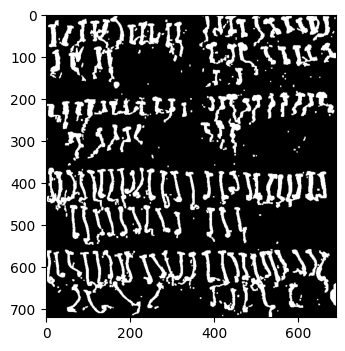

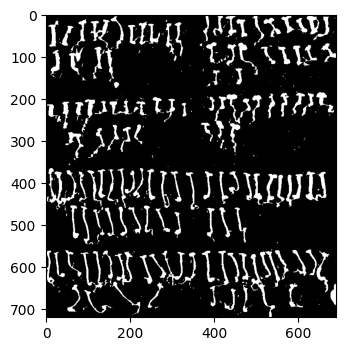

In [378]:
#ksize to 9 for individual, 3 for batch
dilate_img = pcv.dilate(gray_img=s_thresh, ksize=3, i=1)
er_img = pcv.erode(gray_img=dilate_img, ksize=3, i=1)

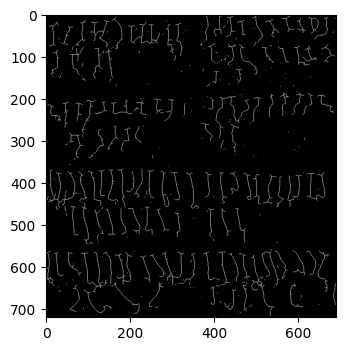

In [379]:
skeleton = pcv.morphology.skeletonize(er_img)

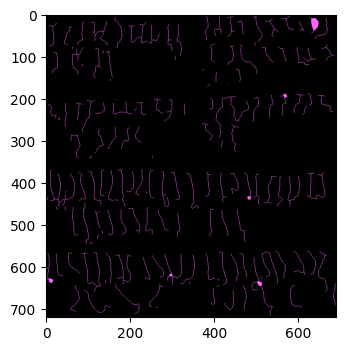

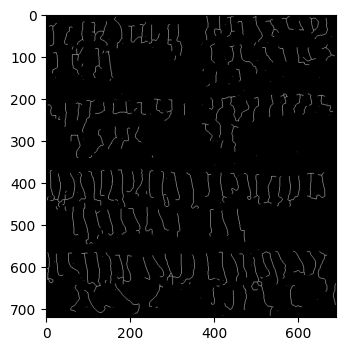

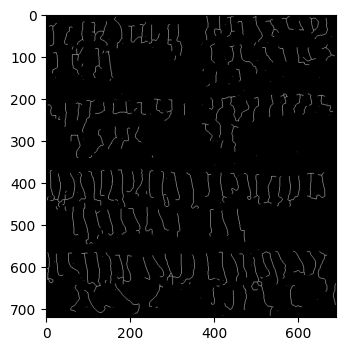

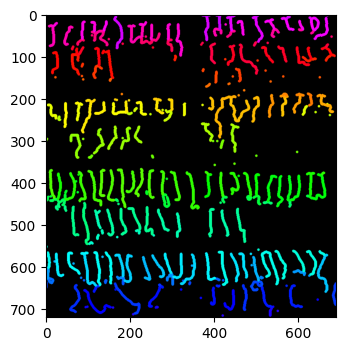

In [380]:
img1, seg_img, edge_objects = pcv.morphology.prune(skel_img=skeleton, size=10)

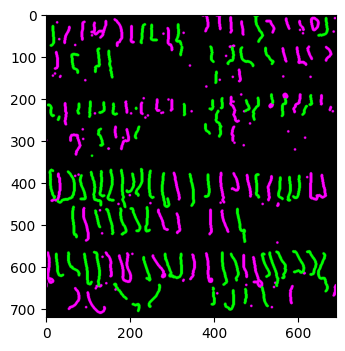

In [372]:
leaf_obj, stem_obj = pcv.morphology.segment_sort(skel_img=skeleton, objects=edge_objects)

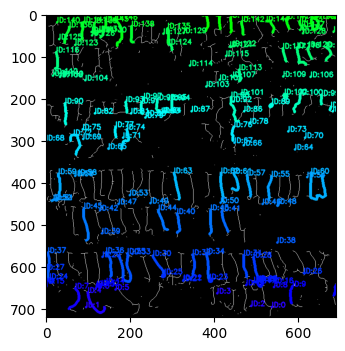

In [381]:
segmented_img, labeled_img = pcv.morphology.segment_id(skel_img=skeleton,
                                                       objects=stem_obj)

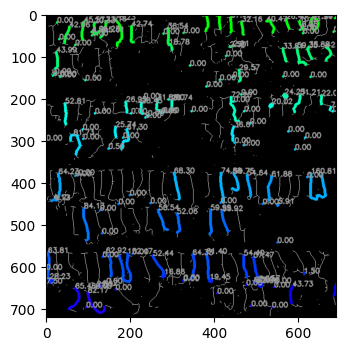

In [382]:
labeled_img2 = pcv.morphology.segment_path_length(segmented_img=segmented_img, 
                                                      objects=stem_obj, label = 'dafault')

In [383]:
path_lengths = pcv.outputs.observations['default']['segment_path_length']['value']
pcv.outputs.save_results(filename='results.txt', outformat="json")
path_lengths

[18.949747383594513,
 3.914213538169861,
 0.0,
 71.71320307254791,
 110.26092952489853,
 49.399494767189026,
 61.85533845424652,
 4.914213538169861,
 78.8345233798027,
 6.328427076339722,
 64.7634556889534,
 87.41168737411499,
 2.2071067690849304,
 113.38224983215332,
 3.914213538169861,
 39.17766922712326,
 7.5,
 7.949747383594513,
 5.328427076339722,
 15.5,
 6.328427076339722,
 9.121320307254791,
 14.778174459934235,
 4.914213538169861,
 24.399494767189026,
 72.19848430156708,
 105.75483322143555,
 69.13351291418076,
 89.19848430156708,
 62.34924215078354,
 92.23401814699173,
 66.47056245803833,
 74.44112491607666,
 63.64213538169861,
 79.47056245803833,
 4.5,
 4.5,
 70.90559107065201,
 80.57716399431229,
 86.71320307254791,
 95.12741661071777,
 170.16042429208755,
 13.985281229019165,
 73.44112491607666,
 80.34061968326569,
 58.81980460882187,
 8.571067690849304,
 9.328427076339722,
 5.121320307254791,
 6.914213538169861,
 36.64213538169861,
 60.64213538169861,
 6.949747383594513,
 